Employee Attrition


description...

In [15]:
import numpy as np
#Initialize a random number generator
#pass an integer if you want results to be reproducible
rng = np.random.RandomState() 

import matplotlib.pyplot as plt  #plotting library
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
scoring_func = make_scorer(mean_squared_error,greater_is_better=False)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from itertools import combinations
from more_itertools import powerset
import operator

## Load the data set

In [16]:
df = pd.read_csv('Employee-Attrition.csv')

In [17]:
df.size

51450

In [18]:
df.MonthlyIncome

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [19]:
df["BusinessTravel"]=df["BusinessTravel"].astype('category').cat.codes
df["Department"]=df["Department"].astype('category').cat.codes
df["EducationField"]=df["EducationField"].astype('category').cat.codes
df["Gender"]=df["Gender"].astype('category').cat.codes
df["JobRole"]=df["JobRole"].astype('category').cat.codes
df["MaritalStatus"]=df["MaritalStatus"].astype('category').cat.codes
df["Over18"]=df["Over18"].astype('category').cat.codes
df["OverTime"]=df["OverTime"].astype('category').cat.codes

In [20]:
dataset=df

In [21]:
dataset['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [8]:
Y=dataset['MonthlyIncome']

In [9]:
Y.describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [10]:
X=df[df.columns[~df.columns.isin(['Attrition','MonthlyIncome'])]]

In [11]:
X.columns.size

33

In [13]:
X.columns.size

33

In [14]:

p=X.columns.size

print(p)




33


In [15]:
y = Y

### Create a training set and a test set





In [16]:
#Split up the big data set into a test set (for final evaluation) and a training set
X_train, X_test, y_train, y_test = train_test_split( X,y, train_size=1400)


Print out (X's are Pandas data frames) the values -- make sure it shuffled

In [17]:
y_train.describe()


count     1400.000000
mean      6514.299286
std       4727.901053
min       1009.000000
25%       2932.750000
50%       4907.000000
75%       8353.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [18]:
np.mean(y_train)

6514.299285714285

# Model Fitting

#### Let's first fit using no features (just the intercept $\beta_0$) and all the features ( OLS or Ordinary Least Squares solution)

# Intercept Model

In [19]:
#Train MSE
y_pred = np.ones(y_train.shape)*(np.mean(y_train))
print(y_pred.shape)
print(y_test.shape)
mse_train_just_intercept = mean_squared_error(y_train,y_pred, squared=True)
print(mse_train_just_intercept)

y_pred = np.ones(y_test.shape)*(np.mean(y_train))
mse_test_just_intercept = mean_squared_error(y_test,y_pred, squared=True)

print('\nTraining set MSE using only the intercept: %.2f'%mse_train_just_intercept)
print('\nTest set MSE using only the intercept: %.2f'%mse_test_just_intercept)

print(y_pred)
print(mse_train_just_intercept)

(1400,)
(70,)
22337081.908285204

Training set MSE using only the intercept: 22337081.91

Test set MSE using only the intercept: 18406433.38
[6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.29928571 6514.29928571 6514.29928571 6514.29928571 6514.29928571
 6514.2

# The OLS solution

In [20]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)
x_pred=pipe.predict(X_test)
# Train MSE
mse_train_OLS = mean_squared_error(y_train, pipe.predict(X_train), squared=True)

# #Test MSE

mse_test_OLS = mean_squared_error(y_test, pipe.predict(X_test), squared=True)

print('\nTraining set MSE using OLS solution: %.2f'%mse_train_OLS)
print('\nTest set MSE using OLS solution: %.2f'%mse_test_OLS)

print(mse_test_OLS)


Training set MSE using OLS solution: 2009262.56

Test set MSE using OLS solution: 1937389.86
1937389.855707149


In [21]:
coef_true=lin.coef_



#### OLS - CV
For reference on the lasso and ridge regression plots, which will be using cross-validation, also calculate the CV hold out MSE using OLS

In [22]:
scaler = StandardScaler()
lin = LinearRegression(normalize=False,fit_intercept=True) 
pipe = make_pipeline(scaler, lin)

pipe.fit(X_train,y_train)

parameters = {}
n_folds=5
gs = GridSearchCV(pipe, parameters, \
                  scoring='neg_mean_squared_error', \
                  cv=n_folds)
gs.fit(X_train,y_train)

scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']

mse_train_OLS_CV = scores[0] 
#each entry for different parameter, but no paramters passed, so just first entry

print('\nCVTraining set MSE using OLS solution: %.2f'%mse_train_OLS_CV)


CVTraining set MSE using OLS solution: 2131568.12


#  Lasso

In [23]:
#Cross-validation: pick the number of folds
n_folds = 5
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')
parameters = { 'lasso__alpha':alphas}

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)
#pre_y=gs.predict(X_test)
print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

Done fitting


In [24]:
t= mean_squared_error(y_test, gs.predict(X_test), squared=True)



In [25]:
t

1822369.1668992147

In [26]:
gs.score(X_test, y_test)

-1822369.1668992147

In [27]:
gs.score(X_train, y_train)

-2066071.270983791

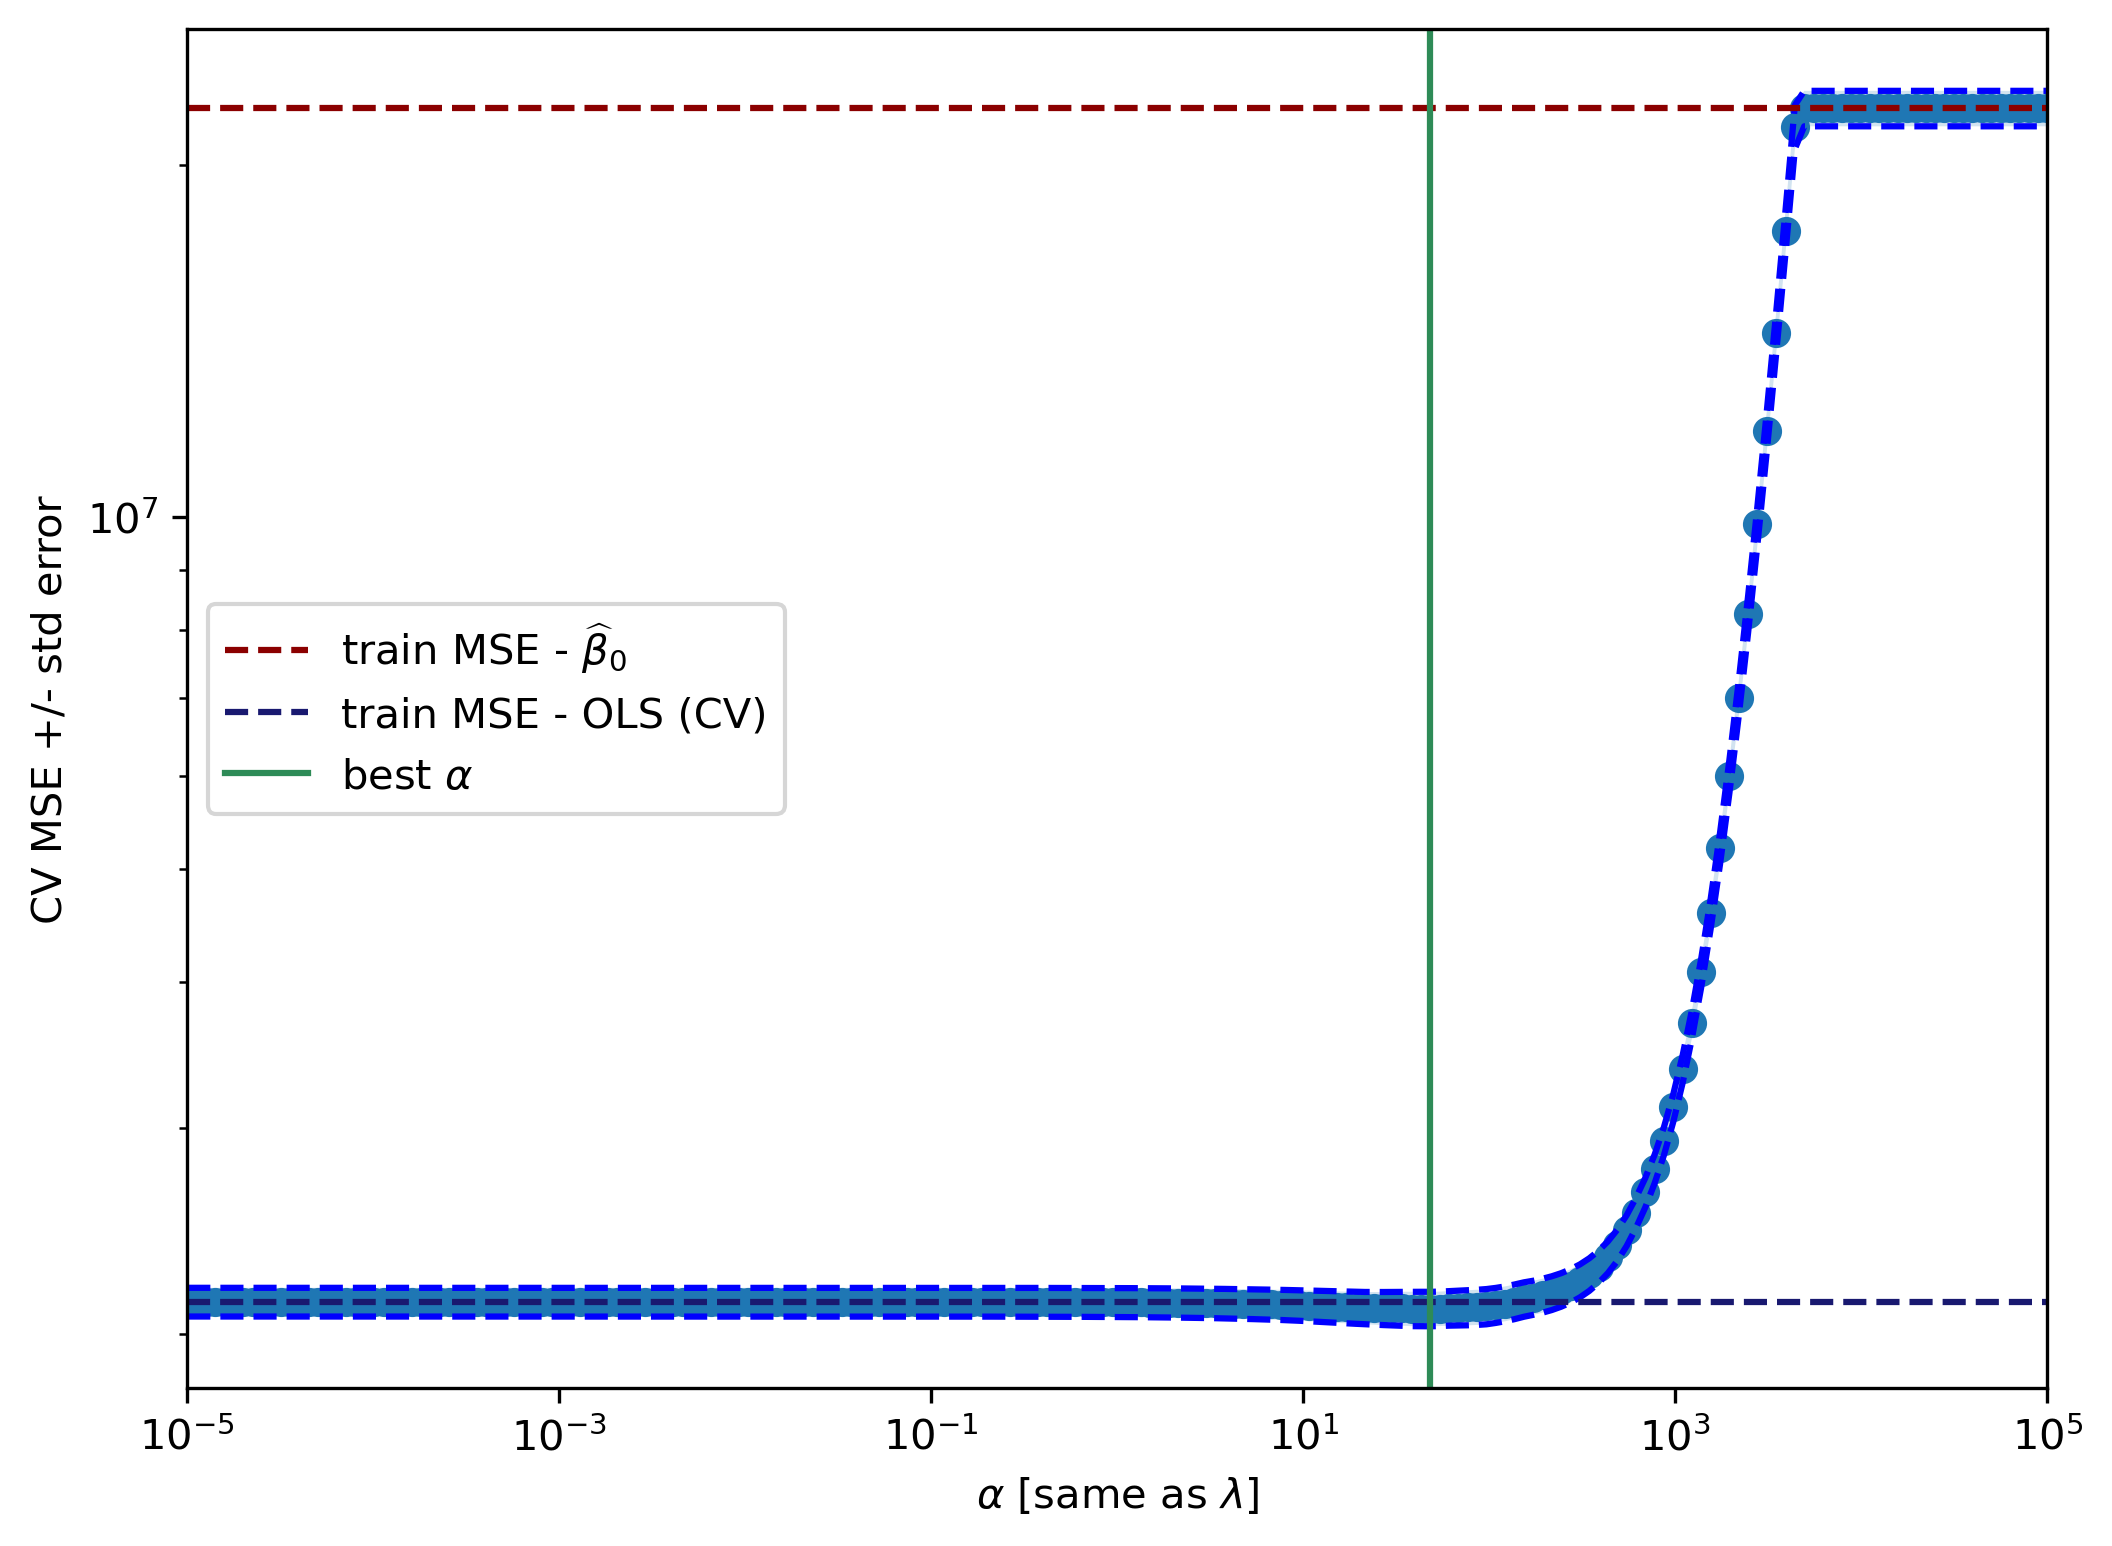

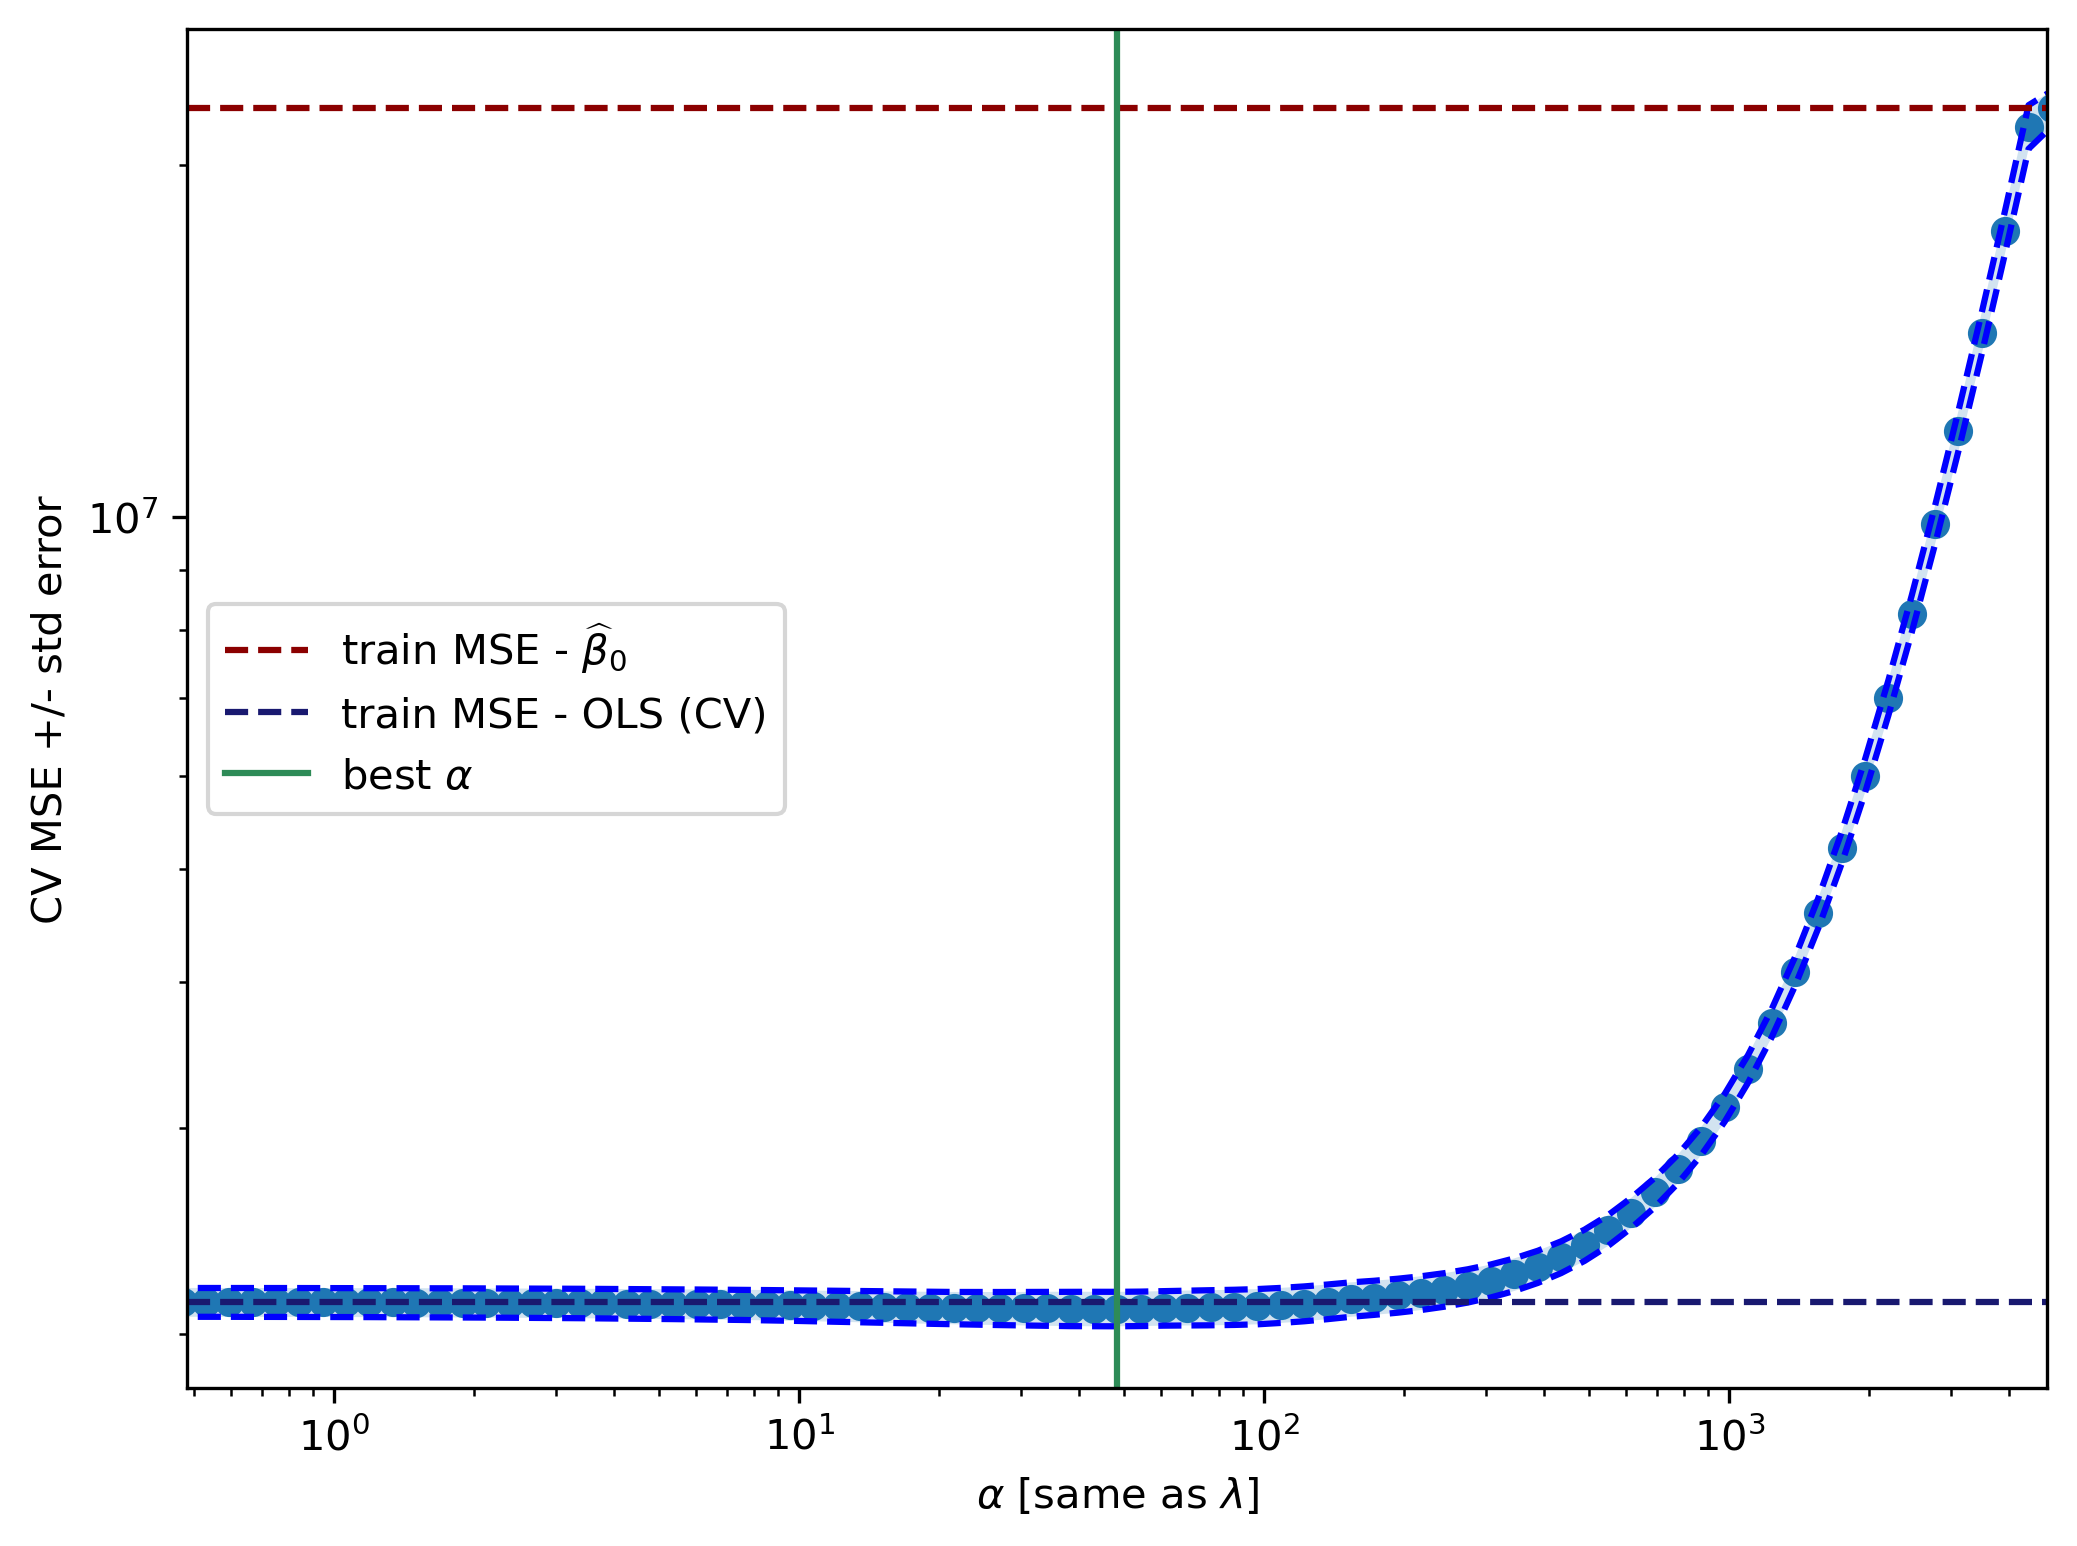

In [28]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
#plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
#plt.axhline(mse_train_using_coef_true, linestyle='--', \
   #         color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
#plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

Text(0, 0.5, 'Coefficients')

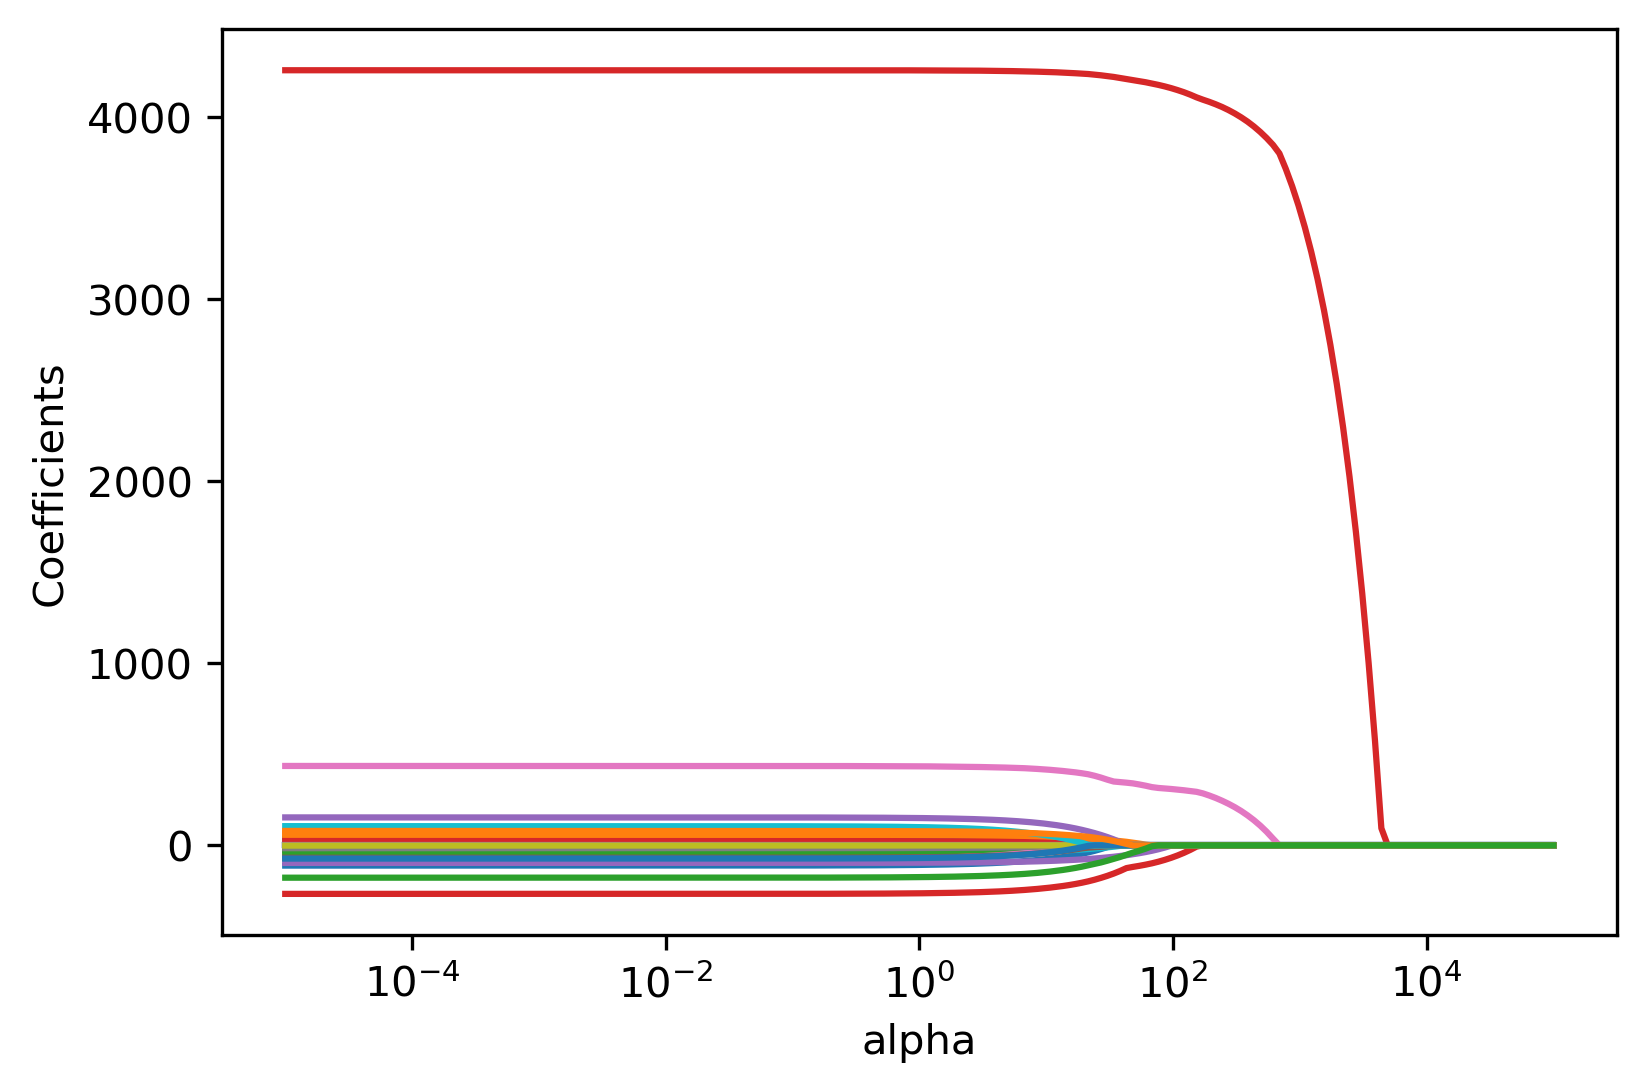

In [29]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
lasso = Lasso(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
coefs = []
all_coef=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'lasso__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(lasso__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)
    all_coef.append({"alpha":a, "coef":pipe.named_steps['lasso'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')

In [30]:
for a in all_coef:
    print(a["coef"])

[-1.11253770e+02  5.88117297e+01  2.68933066e+01 -2.66666939e+02
 -9.66289359e+01 -2.28114271e+01  1.01482919e+00  0.00000000e+00
  2.78600319e+01 -4.36381524e+01  3.35631253e+01  5.55486496e+01
 -2.72096100e+01  4.25790172e+03  1.53483541e+02 -2.56973681e+01
 -5.81082274e+01  1.73207404e+00  1.03871489e+01  0.00000000e+00
  6.67306087e+00  7.01692338e+01 -3.96907568e+01  2.37176741e+01
  0.00000000e+00 -6.83670453e+01  4.36103989e+02 -1.56625891e+01
 -1.36912470e+00  1.05390067e+02 -7.27506784e+01  7.90926983e+01
 -1.77723910e+02]
[-1.11253765e+02  5.88117285e+01  2.68933053e+01 -2.66666935e+02
 -9.66289345e+01 -2.28114261e+01  1.01482784e+00  0.00000000e+00
  2.78600302e+01 -4.36381509e+01  3.35631242e+01  5.55486482e+01
 -2.72096087e+01  4.25790172e+03  1.53483537e+02 -2.56973671e+01
 -5.81082239e+01  1.73207262e+00  1.03871470e+01  0.00000000e+00
  6.67305992e+00  7.01692277e+01 -3.96907511e+01  2.37176730e+01
  0.00000000e+00 -6.83670420e+01  4.36103987e+02 -1.56625879e+01
 -1.369

In [31]:
best_alpha_lasso = gs.best_params_['lasso__alpha']
print(best_alpha_lasso)

48.241087041653735


In [32]:
scaler = StandardScaler()
lasso = Lasso(alpha=best_alpha_lasso,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, lasso)
pipe.fit(X_train, y_train)

best_coef_lasso = pipe.named_steps['lasso'].coef_

In [33]:
mean_squared_error(y_test, pipe.predict(X_test), squared=True)

1822369.1668992147

In [34]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_lasso[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -111.20   -0.00
   Feature  1:   58.29   14.77
   Feature  2:   26.91   0.00
   Feature  3:   -267.96   -118.50
   Feature  4:   -96.46   -48.95
   Feature  5:   -22.98   -0.00
   Feature  6:    2.08   -0.00
   Feature  7:   -3691665443761695.50   0.00
   Feature  8:   28.29   0.00
   Feature  9:   -43.42   -0.00
   Feature 10:   33.99   0.00
   Feature 11:   55.27   3.55
   Feature 12:   -26.69   -0.00
   Feature 13:   4258.41   4203.90
   Feature 14:   154.56   0.00
   Feature 15:   -26.03   -0.00
   Feature 16:   -57.40   -0.00
   Feature 17:    2.18   -0.00
   Feature 18:   10.50   0.00
   Feature 19:   8351574353.56   0.00
   Feature 20:    6.01   0.00
   Feature 21:   69.78   0.00
   Feature 22:   -39.17   0.00
   Feature 23:   24.53   0.00
   Feature 24:   -714802.59   0.00
   Feature 25:   -68.47   -0.00
   Feature 26:   435.92   340.41
   Feature 27:   -15.85   -0.00
   Feature 28:   -1.27   -0.00
   Feature 29:   105.38   0.00

# Ridge -- model fit

In [35]:
#Cross-validation: pick the number of folds
n_folds = 5
#Specify the lambdas we will check.  
n_alphas = 200 
alphas = np.logspace(-10, 10, n_alphas) #grid search for lambda (aka 'alpha')
#Create a scikit-learn 'pipeline' for standardizing the data (scale so unit variance)
#  Then use scikit-learn 'gridsearchCV' with that pipeline in lieu 
#    of having separate for loops.
#  
parameters = { 'ridge__alpha':alphas}
scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
print('\n\nParameters in the pipeline you can set:\n')
print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
#Now do the grid search - one call to fit() tells it to run the 
# pipeline in k-fold CV, in each split fitting for all lambdas
gs = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
gs.fit(X_train,y_train)

#print('\nDone fitting')



Parameters in the pipeline you can set:

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'ridge', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.5529...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10])},
             scoring='neg_mean_squared_error')

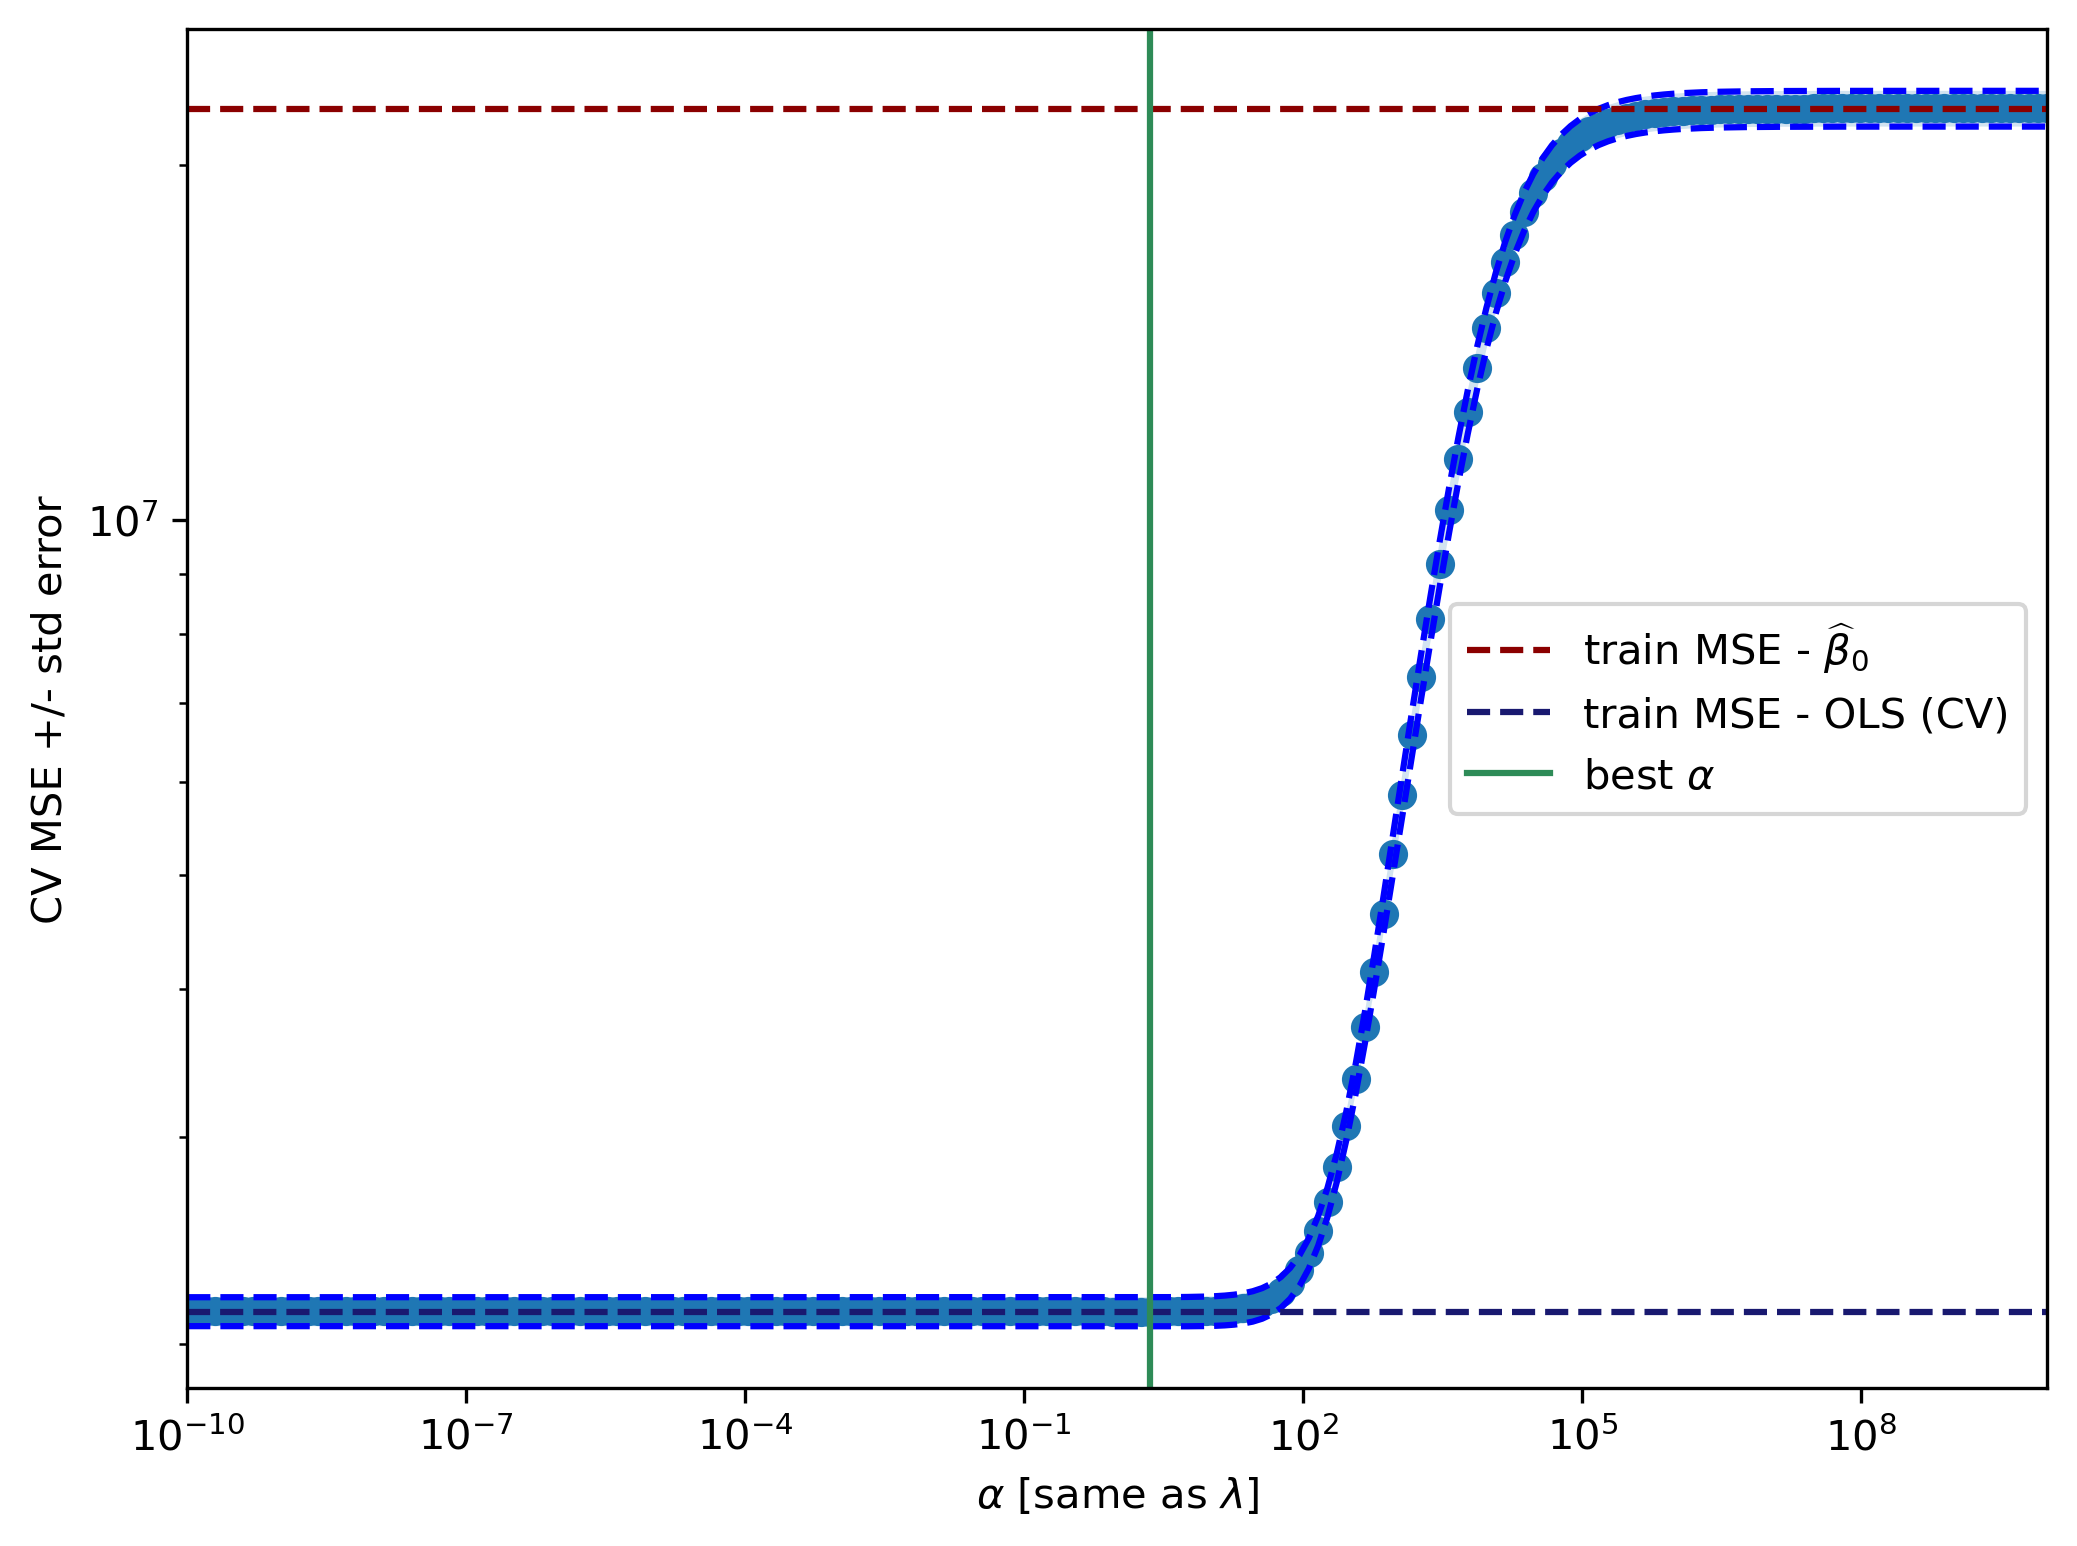

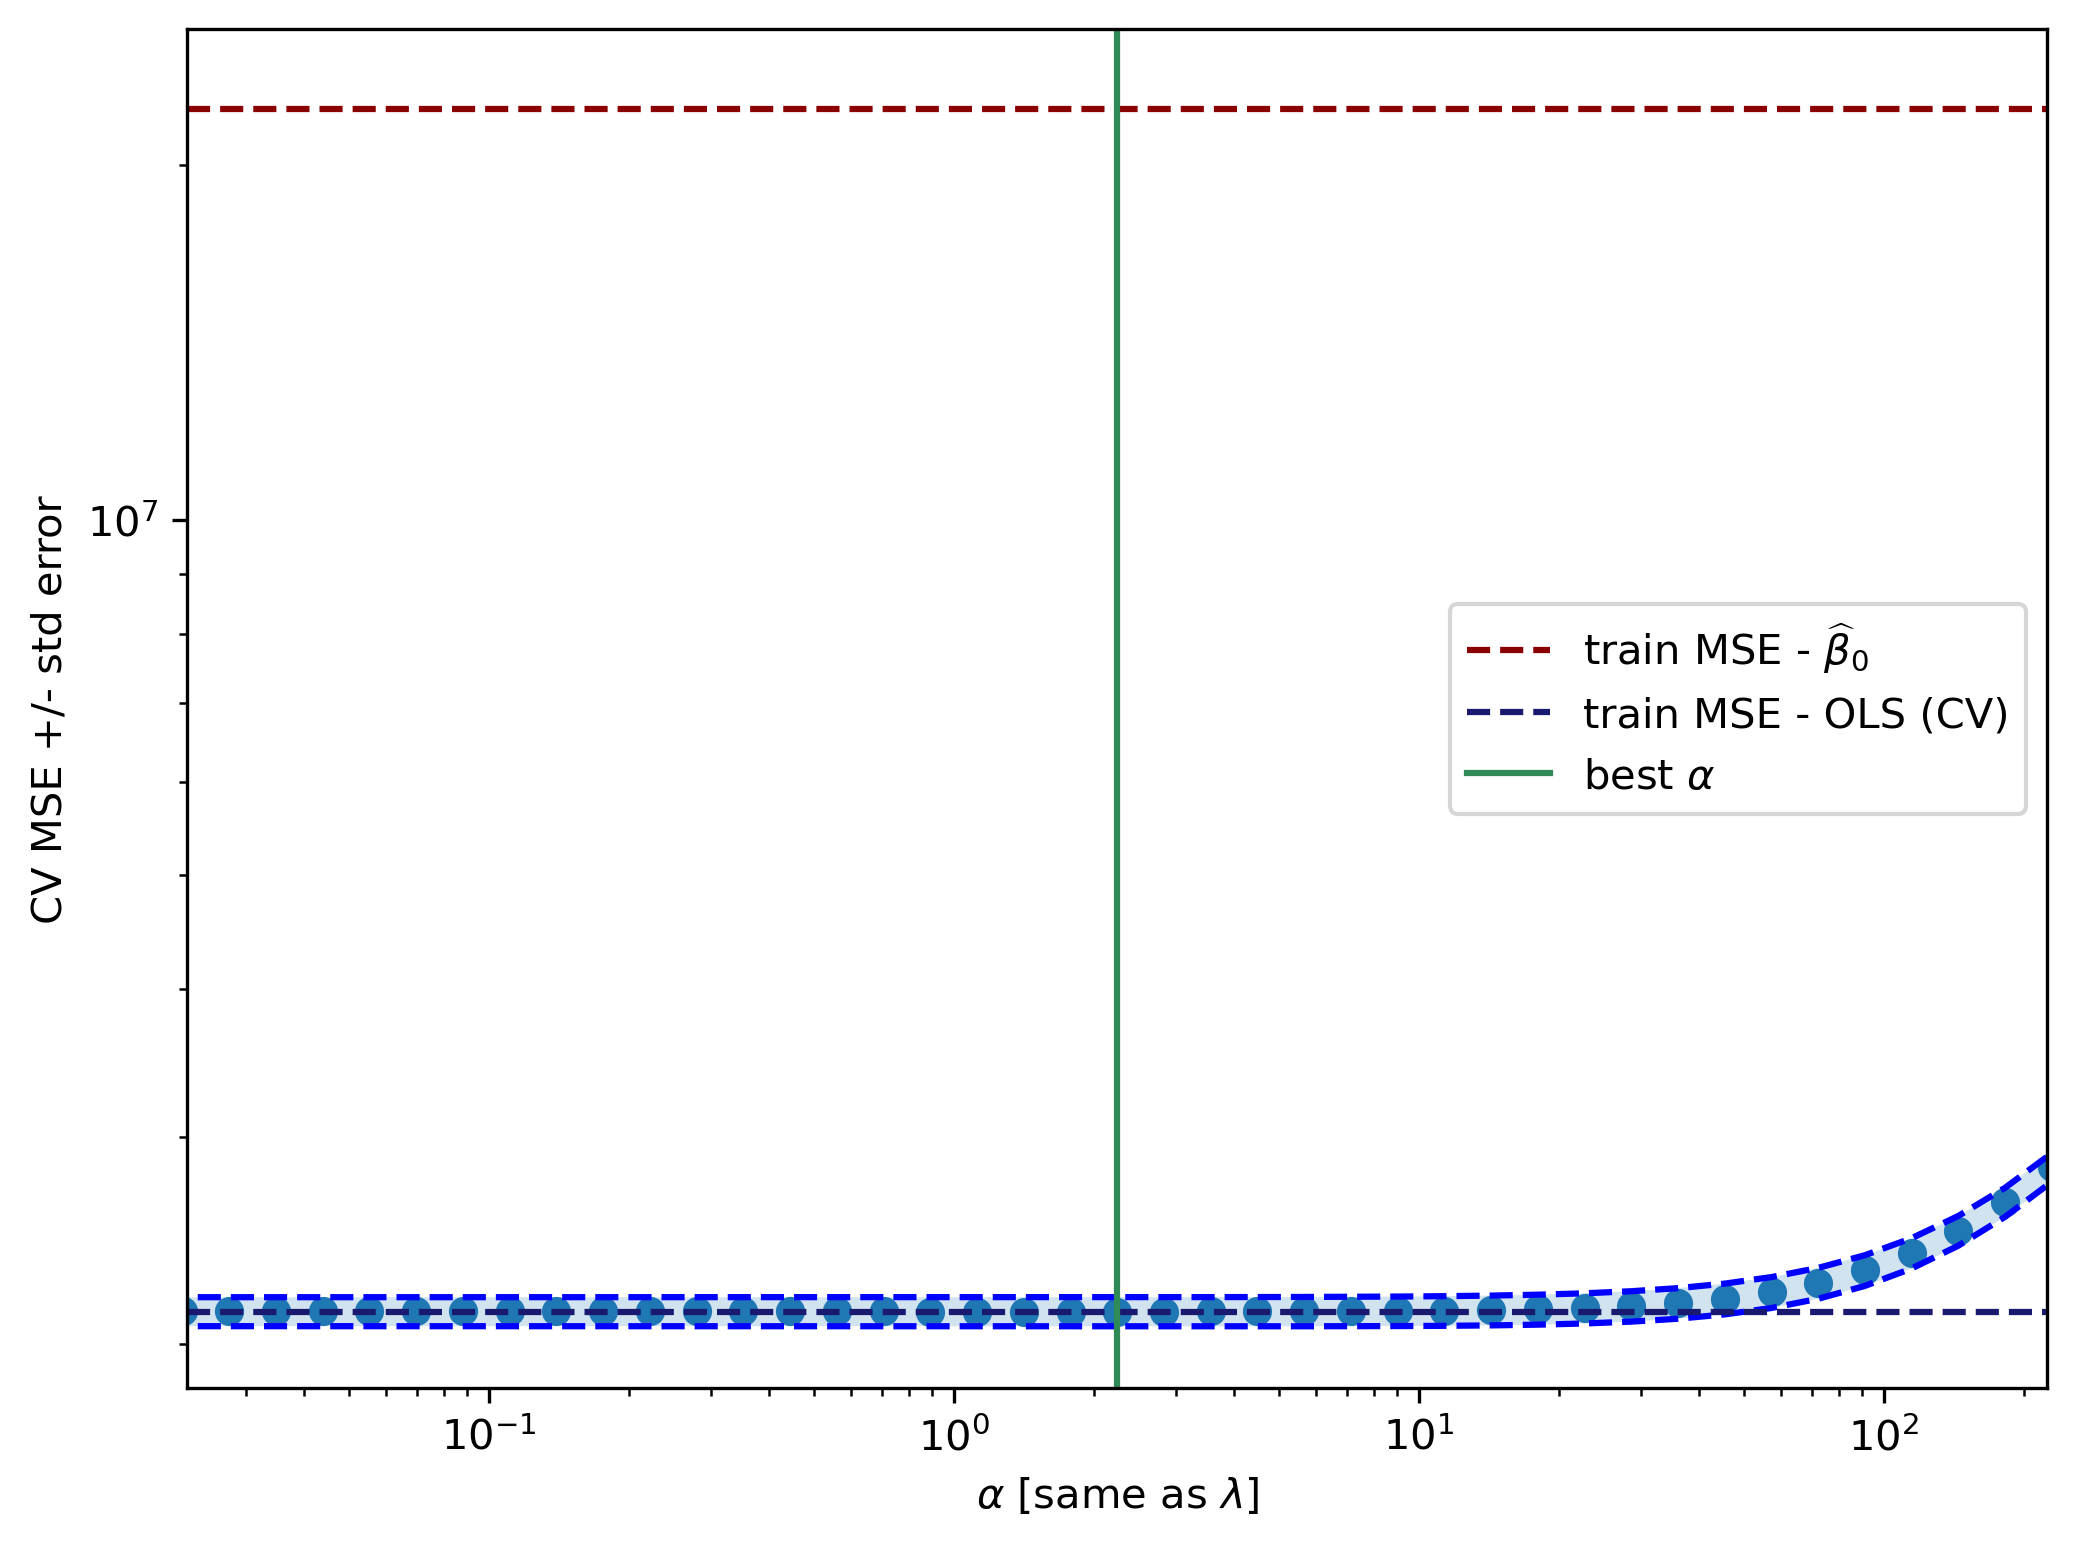

In [36]:
#For the gridcv, it maximizes the negative MSE; scores are negative of what we want
scores = -gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

# #true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')
plt.xlim([alphas[0], alphas[-1]])
# plt.ylim(mse_train_using_coef_true*.5, 2*mse_train_just_intercept)
plt.legend()




#zoom in - same figure
plt.figure().set_size_inches(8, 6)
plt.loglog(alphas, scores,'o')

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.loglog(alphas, scores + std_error, 'b--')
plt.loglog(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV MSE +/- std error')
plt.xlabel(r'$\alpha$ [same as $\lambda$]')


#plot baseline fits for training set
#just intercept
plt.axhline(mse_train_just_intercept, linestyle='--',\
            color='darkred', \
            label=r'train MSE - $\widehat{\beta}_0$')

#true coefficients
# plt.axhline(mse_train_using_coef_true, linestyle='--', \
#             color='black',label='train MSE - true coef')

#OLS solution (no penalty-- all features)
plt.axhline(mse_train_OLS_CV, linestyle='--', \
            color='midnightblue',label='train MSE - OLS (CV)')

#Mark the value of the best $\alpha$
plt.axvline(alphas[scores.argmin()], linestyle='-', \
            color='seagreen',label=r'best $\alpha$')

plt.xlim(alphas[scores.argmin()]/100,alphas[scores.argmin()]*100)
# plt.ylim(mse_train_using_coef_true*.5, 2*scores[0])
plt.legend()

Text(0, 0.5, 'Coefficients')

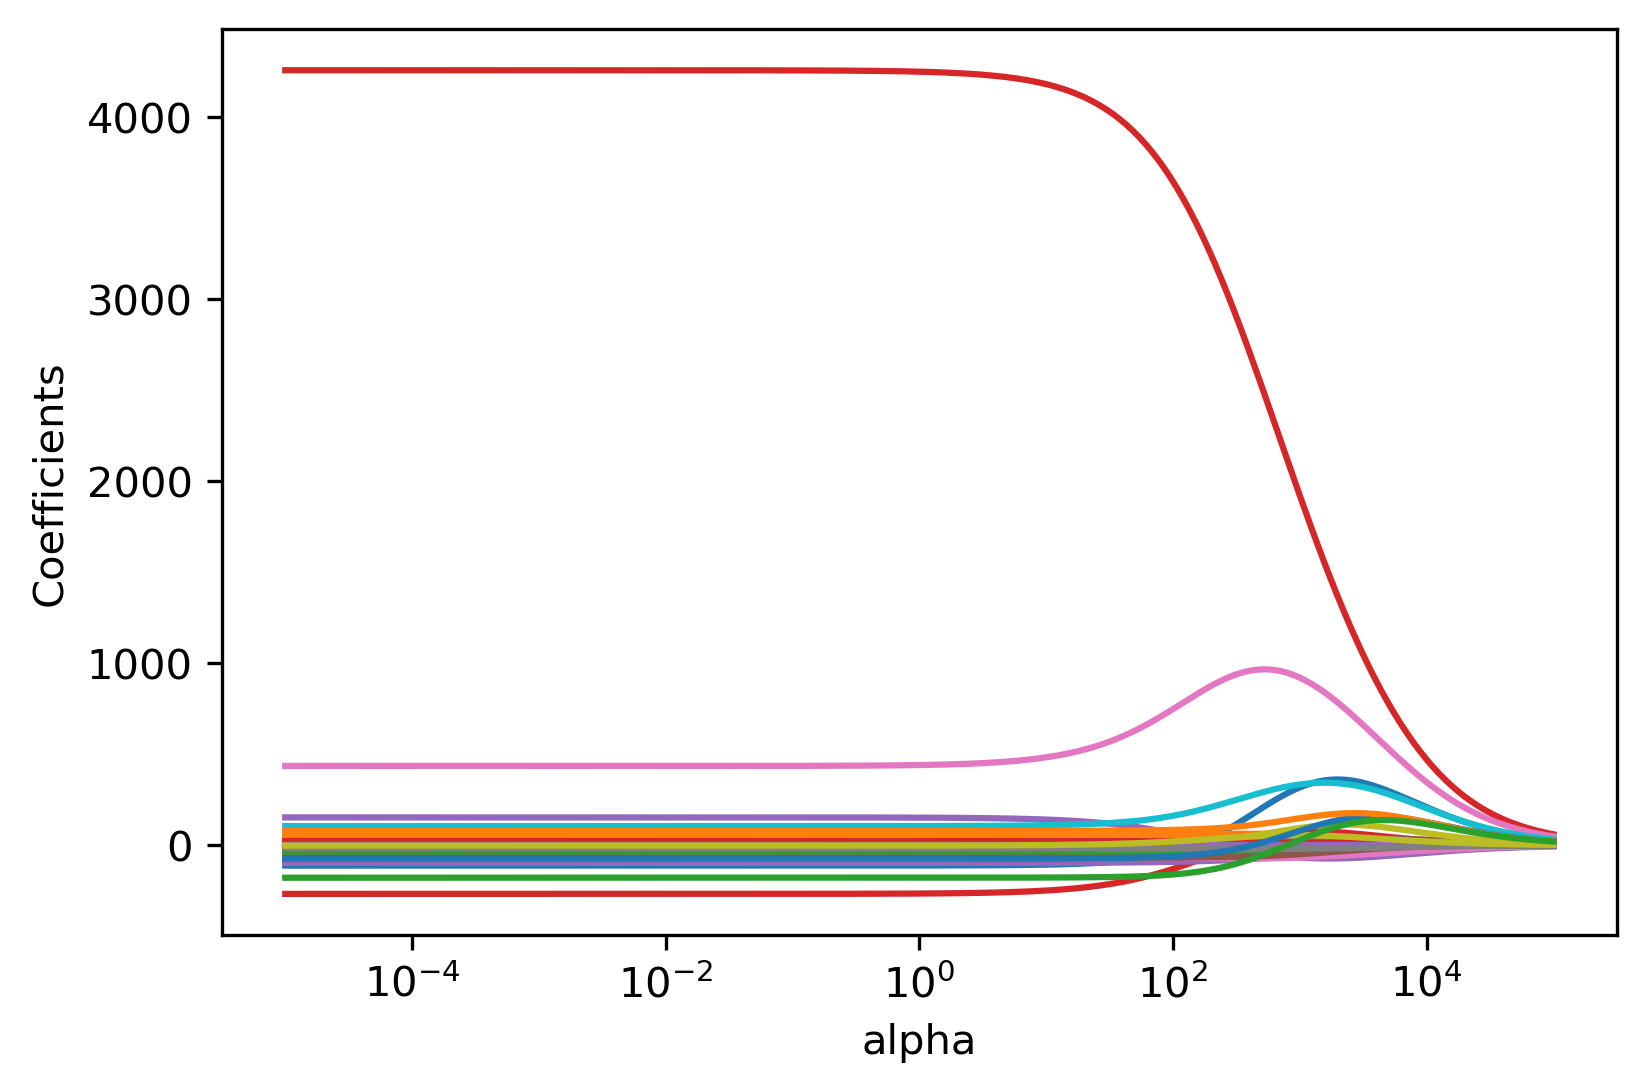

In [37]:
n_alphas = 200 
alphas = np.logspace(-5, 5, n_alphas) #grid search for lambda (aka 'alpha')

scaler = StandardScaler()
ridge = Ridge(normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
coefs = []
co_ridge=[]
# print(pipe.get_params().keys()) #reports input names can set (look for the hyper-parameters)
parameters = {'ridge__alpha':alphas}
# model = GridSearchCV(pipe, parameters, scoring='neg_mean_squared_error', cv=n_folds)
# model.fit(X_train,y_train)
for a in alphas:
    pipe.set_params(ridge__alpha=a)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge'].coef_)
    # print(pipe.named_steps['ridge'].coef_)
    # print("new alpha")
    co_ridge.append({'alpha':a, 'coef':pipe.named_steps['ridge'].coef_})

plt.figure()
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')


In [38]:
best_alpha_ridge = gs.best_params_['ridge__alpha']
print(best_alpha_ridge)

2.24780583354873


In [39]:
scaler = StandardScaler()
ridge = Ridge(alpha=best_alpha_ridge,normalize=False,fit_intercept=True) #we will pass through alpha values later
pipe = make_pipeline(scaler, ridge)
pipe.fit(X_train, y_train)

best_coef_ridge = pipe.named_steps['ridge'].coef_



In [40]:
mean_squared_error(y_test, pipe.predict(X_test))

1941723.4807717584

In [41]:
print('\nCoefficients    [true]  [lasso]')
for i in range(p):
    print('   Feature %2i:   %5.2f   %.2f'%(i,\
                    coef_true[i],best_coef_ridge[i]))


Coefficients    [true]  [lasso]
   Feature  0:   -111.20   -110.16
   Feature  1:   58.29   58.83
   Feature  2:   26.91   26.78
   Feature  3:   -267.96   -262.41
   Feature  4:   -96.46   -96.50
   Feature  5:   -22.98   -23.03
   Feature  6:    2.08   0.66
   Feature  7:   -3691665443761695.50   0.00
   Feature  8:   28.29   27.66
   Feature  9:   -43.42   -43.42
   Feature 10:   33.99   33.52
   Feature 11:   55.27   55.07
   Feature 12:   -26.69   -27.18
   Feature 13:   4258.41   4240.34
   Feature 14:   154.56   150.74
   Feature 15:   -26.03   -25.58
   Feature 16:   -57.40   -58.46
   Feature 17:    2.18   2.07
   Feature 18:   10.50   10.11
   Feature 19:   8351574353.56   0.00
   Feature 20:    6.01   6.50
   Feature 21:   69.78   69.81
   Feature 22:   -39.17   -39.76
   Feature 23:   24.53   23.70
   Feature 24:   -714802.59   0.00
   Feature 25:   -68.47   -68.34
   Feature 26:   435.92   447.21
   Feature 27:   -15.85   -15.76
   Feature 28:   -1.27   -0.71
   Feature 2

# Exhaustive search (best subset search)

In [ ]:
p = X_train.shape[1] #the number of columns
list_features = range(0,p)

print(list_features)

for subset in powerset(list_features):
    print(subset)

range(0, 33)
()
(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(0, 31)
(0, 32)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(1, 31)
(1, 32)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(2, 21)
(2, 22)
(2, 23)
(2, 24)
(2, 25)
(2, 26)
(2, 27)
(2, 28)
(2, 29)
(2, 30)
(2, 31)
(2, 32)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3

KeyboardInterrupt: 

In [ ]:
numbers=[i for i in range(0,p-2)] 

print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets = {}
subsets[0] = {'features':(), 'aicPenalty':0 , 'trainMSE':mse_test_just_intercept, 'testMSE': mse_test_just_intercept,\
     'cardinality': (), 'AIC': mse_test_just_intercept, 'BIC':mse_test_just_intercept}  

numbers=numbers
features=[]

#subset...
for subset in powerset(list_features):
       
    if len(subset)==0:
        continue # for the empty set, skip to next subset
    
    #first just use columns corresponding to this feature 
    cols = list(i for i in subset) #adjust indexing

    X_train_subset = X_train.iloc[:,cols]
    X_test_subset=X_test.iloc[:,cols]
    model.fit(X_train_subset,y_train)
    mse_train = mean_squared_error(y_train, model.predict(X_train_subset))

    mse_test_subset=mean_squared_error(y_test, model.predict(X_test_subset))

    #update if this is the best seen of this cardinality
    k = len(subset)
    
    if k not in list(subsets.keys()):
        #add as currently best
        subsets[k] = {'features':subset, 'trainMSE':mse_train, 'testMSE':mse_test_subset, 'cardinality' : len(subset) }
    else:
        if subsets[k]['trainMSE']>mse_train:
            #add as currently best
            subsets[k] = {'features':subset, 'trainMSE':mse_train , 'testMSE':mse_test_subset, 'cardinality': len(subset) }
    
    print('\n'+'Features: '+str(subset)+' '+  ' MSE: '+str(mse_train))
       

NameError: name 'numbers' is not defined

In [ ]:
subsets[8]['trainMSE']


KeyError: 8

In [ ]:
trainMSE_vals = []#save for plotting
AIC_vals = [] 
BIC_vals = []
AIC_pen=[]
for k in range(p+1):
    subset = subsets[k]['features']
    mse_train = subsets[k]['trainMSE']
    mse_test = subsets[k]['testMSE']
    noise_var_estimate = subsets[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets[k]['AIC'] = mse_train+AIC_penalty
    subsets[k]['aicPenalty'] = AIC_penalty
    
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets[k]['BIC'] = mse_test+BIC_penalty
    # subsets[k]['aicPenalty']
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals.append(subsets[k]['trainMSE'])
    AIC_vals.append(subsets[k]['AIC'])
    BIC_vals.append(subsets[k]['BIC'])
    AIC_pen.append(subsets[k]['aicPenalty'])


In [ ]:
for i in range(p+1):
    print("Feature:"+ str(subsets[i]["features"])+", training MSE + AIC: "+ str(subsets[i]["AIC"])+", test MSE: "+ str(subsets[i]["testMSE"]) )

# Forward search 

In [42]:
#forward...

model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above
subsets_fw = {}
subsets_fw[0] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE':mse_train_just_intercept, \
              'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}  

selected_features = []
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    #mse_test=99999999
    for j in range(0,p):
        if j not in cols:
            cols.append(j)
        else:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_fw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train)+ '\ttestMSE: ' + str(mse_test_fw))
        
        if mse_train < mse:
            k = j
            mse = mse_train
            mse_test=mse_test_fw

        cols = selected_features

        cols.remove(j)
    
    selected_features.append(k)
    counter = counter + 1
    print(selected_features)
    subsets_fw[len(selected_features)] = {'cardinality': len(selected_features), 'features': str(selected_features), 'trainMSE': mse, 'testMSE':mse_test_fw}
    

cols: [0]	trainMSE: 16758023.42424543	testMSE: 14719063.381918062
cols: [1]	trainMSE: 22305533.109285697	testMSE: 18495007.69926165
cols: [2]	trainMSE: 22336416.294423256	testMSE: 18394338.88152535
cols: [3]	trainMSE: 22277036.310688578	testMSE: 18293689.482513115
cols: [4]	trainMSE: 22329443.490493644	testMSE: 18425531.790899698
cols: [5]	trainMSE: 22140142.367614	testMSE: 18152813.249249052
cols: [6]	trainMSE: 22312318.11296557	testMSE: 18144729.558169067
cols: [7]	trainMSE: 22337081.908285204	testMSE: 18406433.377531122
cols: [8]	trainMSE: 22336054.079383917	testMSE: 18354665.611186944
cols: [9]	trainMSE: 22337061.527719278	testMSE: 18401674.036882844
cols: [10]	trainMSE: 22318419.332399465	testMSE: 18312113.510081273
cols: [11]	trainMSE: 22334344.560535766	testMSE: 18355351.662037447
cols: [12]	trainMSE: 22328222.302668255	testMSE: 18485479.44080474
cols: [13]	trainMSE: 2162268.8073058845	testMSE: 1841828.053952392
cols: [14]	trainMSE: 22111267.37752705	testMSE: 18839764.366538323


In [43]:
#forward...
trainMSE_vals_fw = []#save for plotting
AIC_vals_fw = [] 
BIC_vals_fw = []

for k in range(p+1):
    subset = subsets_fw[k]['features']
    mse_train = subsets_fw[k]['trainMSE']
    mse_test = subsets_fw[k]['testMSE']
    noise_var_estimate = subsets_fw[p]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_fw[k]['BIC'] = mse_test+BIC_penalty
    print("MSE: "+ str(mse_train)+ "Penalty: "+str(AIC_penalty) + "Cardinality: "+str(k))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))
    trainMSE_vals_fw.append(subsets_fw[k]['trainMSE'])
    AIC_vals_fw.append(subsets_fw[k]['AIC'])
    BIC_vals_fw.append(subsets_fw[k]['BIC'])
# print(BIC_vals_fw)
# print("test")
# print(AIC_vals_fw)
#print(trainMSE_vals_fw+BIC_vals_fw)

MSE: 22337081.908285204Penalty: 0.0Cardinality: 0
MSE: 2162268.8073058845Penalty: 2870.3670222229966Cardinality: 1
MSE: 2105639.600035981Penalty: 5740.734044445993Cardinality: 2
MSE: 2076761.8340079733Penalty: 8611.10106666899Cardinality: 3
MSE: 2063593.1312997437Penalty: 11481.468088891987Cardinality: 4
MSE: 2051428.7796208165Penalty: 14351.835111114984Cardinality: 5
MSE: 2042655.7892646648Penalty: 17222.20213333798Cardinality: 6
MSE: 2035283.9762452894Penalty: 20092.569155560977Cardinality: 7
MSE: 2030665.8419885498Penalty: 22962.936177783973Cardinality: 8
MSE: 2027341.077735907Penalty: 25833.30320000697Cardinality: 9
MSE: 2024486.60759312Penalty: 28703.67022222997Cardinality: 10
MSE: 2022717.410339508Penalty: 31574.03724445296Cardinality: 11
MSE: 2021350.9802383324Penalty: 34444.40426667596Cardinality: 12
MSE: 2020165.8457311261Penalty: 37314.771288898955Cardinality: 13
MSE: 2018130.5544907392Penalty: 40185.138311121955Cardinality: 14
MSE: 2016687.447953791Penalty: 43055.50533334495

In [44]:
subsets_fw

{0: {'cardinality': 0,
  'features': (),
  'trainMSE': 22337081.908285204,
  'testMSE': 22337081.908285204,
  'AIC': 22337081.908285204,
  'BIC': 22337081.908285204},
 1: {'cardinality': 1,
  'features': '[13]',
  'trainMSE': 2162268.8073058845,
  'testMSE': 16924491.2255235,
  'AIC': 2165139.1743281074,
  'BIC': 16934888.021404635},
 2: {'cardinality': 2,
  'features': '[13, 26]',
  'trainMSE': 2105639.600035981,
  'testMSE': 1807210.9091651363,
  'AIC': 2111380.334080427,
  'BIC': 1828004.5009274045},
 3: {'cardinality': 3,
  'features': '[13, 26, 3]',
  'trainMSE': 2076761.8340079733,
  'testMSE': 1859868.6718518913,
  'AIC': 2085372.9350746423,
  'BIC': 1891059.0594952938},
 4: {'cardinality': 4,
  'features': '[13, 26, 3, 32]',
  'trainMSE': 2063593.1312997437,
  'testMSE': 1799772.490889617,
  'AIC': 2075074.5993886357,
  'BIC': 1841359.6744141537},
 5: {'cardinality': 5,
  'features': '[13, 26, 3, 32, 14]',
  'trainMSE': 2051428.7796208165,
  'testMSE': 1821227.763363125,
  'AIC

In [45]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", training MSE + AIC: "+ str(subsets_fw[i]["AIC"])+", test MSE: "+ str(subsets_fw[i]["testMSE"]) )

Feature:(), training MSE + AIC: 22337081.908285204, test MSE: 22337081.908285204
Feature:[13], training MSE + AIC: 2165139.1743281074, test MSE: 16924491.2255235
Feature:[13, 26], training MSE + AIC: 2111380.334080427, test MSE: 1807210.9091651363
Feature:[13, 26, 3], training MSE + AIC: 2085372.9350746423, test MSE: 1859868.6718518913
Feature:[13, 26, 3, 32], training MSE + AIC: 2075074.5993886357, test MSE: 1799772.490889617
Feature:[13, 26, 3, 32, 14], training MSE + AIC: 2065780.6147319314, test MSE: 1821227.763363125
Feature:[13, 26, 3, 32, 14, 4], training MSE + AIC: 2059877.9913980027, test MSE: 1791771.8507346136
Feature:[13, 26, 3, 32, 14, 4, 0], training MSE + AIC: 2055376.5454008505, test MSE: 1769338.614570749
Feature:[13, 26, 3, 32, 14, 4, 0, 31], training MSE + AIC: 2053628.7781663337, test MSE: 1802819.7844696112
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11], training MSE + AIC: 2053174.3809359139, test MSE: 1809189.795968951
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1], tra

In [46]:
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["AIC"]) )


Feature:(), AIC: 22337081.908285204
Feature:[13], AIC: 2165139.1743281074
Feature:[13, 26], AIC: 2111380.334080427
Feature:[13, 26, 3], AIC: 2085372.9350746423
Feature:[13, 26, 3, 32], AIC: 2075074.5993886357
Feature:[13, 26, 3, 32, 14], AIC: 2065780.6147319314
Feature:[13, 26, 3, 32, 14, 4], AIC: 2059877.9913980027
Feature:[13, 26, 3, 32, 14, 4, 0], AIC: 2055376.5454008505
Feature:[13, 26, 3, 32, 14, 4, 0, 31], AIC: 2053628.7781663337
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11], AIC: 2053174.3809359139
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1], AIC: 2053190.27781535
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1, 9], AIC: 2054291.4475839608
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1, 9, 10], AIC: 2055795.3845050083
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1, 9, 10, 29], AIC: 2057480.6170200252
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1, 9, 10, 29, 30], AIC: 2058315.692801861
Feature:[13, 26, 3, 32, 14, 4, 0, 31, 11, 1, 9, 10, 29, 30, 21], AIC: 2059742.9532871358
Feature:[13, 26, 3, 3

# Backward search

In [47]:

model = make_pipeline(StandardScaler(), LinearRegression())

#keep a dictionary, with key as the cardinality and value as 
#  a dictionary with values 'features' (list) and 'trainMSE' (float)
#  initialize with empty set (intercept), calculated above

subsets_bw = {}
  

selected_features = tuple(i for i in range(0,p))
discarded_features = ()
counter = 0
for i in range(0,p):
       
    # if len(subset)==0:
        # continue # for the empty set, skip to next subset
    cols = selected_features
    k = -1
    mse = 99999999
    mse_test=9999999
    selected_set = ()
    for j in range(-1,p):
        if j in list(discarded_features):
            continue
        
        # cols = cols + (j,)
        cols = list(x for x in cols if x != j)
        # print(cols)
        
        if len(cols)==0:
            continue
        
        X_train_subset = X_train.iloc[:,cols]
        X_test_subset=X_test.iloc[:, cols]
        # print('X_train_subset shape: ' + str(X_train_subset.shape))
        
        model.fit(X_train_subset,y_train)
        mse_train = mean_squared_error(y_train, model.predict(X_train_subset))
        mse_test_bw = mean_squared_error(y_test, model.predict(X_test_subset))
        print('cols: ' + str(cols) + '\ttrainMSE: ' + str(mse_train) + '\ttestMSE: ' + str(mse_test_bw))

        if mse_train < mse:
            k = j
            selected_set = cols
            mse = mse_train
            mse_test=mse_test_bw

        cols = selected_features
    

    subsets_bw[counter] = {'cardinality': len(selected_set), 'features': selected_set, 'trainMSE': mse, 'testMSE': mse_test}
    selected_features = tuple(x for x in cols if x != k)

    discarded_features = discarded_features + (k,)
    counter = counter + 1
    
    print('cardinality: ' + str(len(selected_set))+ ' features: ' + str(selected_set)+' trainMSE: '+str(mse))
    subsets_bw[counter] = {'cardinality':0, 'features':(), 'trainMSE':mse_train_just_intercept, 'testMSE': mse_train_just_intercept, 'AIC':mse_train_just_intercept, 'BIC':mse_train_just_intercept}

print('counter: ' + str(len(subsets_bw)))     

cols: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2009262.5635274686	testMSE: 1937389.855707149
cols: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2015302.454133924	testMSE: 1912565.6677500121
cols: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2012656.61947297	testMSE: 1946659.912566859
cols: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2009963.3285276692	testMSE: 1931309.7738282075
cols: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]	trainMSE: 2046539.214767159	testMSE: 2027224.636573574
cols: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,

In [48]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", Test MSE: "+ str(subsets_bw[i]["trainMSE"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], Test MSE: 2009257.9310278033
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32], Test MSE: 2009259.661153153
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 27

In [49]:
#backward...
trainMSE_vals_bw = []#save for plotting
AIC_vals_bw = [] 
BIC_vals_bw = []

for k in range(p+1):
    subset = subsets_bw[k]['features']
    mse_train = subsets_bw[k]['trainMSE']
    mse_test = subsets_bw[k]['testMSE']
    noise_var_estimate = subsets_bw[0]['trainMSE'] #use the model with all predictors
    
    n_train_samples = X_train.shape[0]
    
    AIC_penalty = 2*k*noise_var_estimate/n_train_samples
    
    subsets_bw[k]['AIC'] = mse_train+AIC_penalty
    BIC_penalty = np.log(n_train_samples)*k*noise_var_estimate/n_train_samples
    subsets_bw[k]['BIC'] = mse_test+BIC_penalty
    # print("MSE: "+ str(mse_train))
    # print("AIC: "+ str(AIC_penalty))
    # print("BIC: "+ str(BIC_penalty))

    trainMSE_vals_bw.append(subsets_bw[k]['trainMSE'])
    AIC_vals_bw.append(subsets_bw[k]['AIC'])
    BIC_vals_bw.append(subsets_bw[k]['BIC'])

#print(AIC_vals_bw)

In [50]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", training MSE + AIC: "+ str(subsets_bw[i]["AIC"])+", test MSE: "+ str(subsets_bw[i]["testMSE"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 2009256.9155560976, test MSE: 1937124.5218729193
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 2012127.2825783207, test MSE: 1937124.5218729193
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 2014997.6496005435, test MSE: 1937124.521872919
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 2017868.0166227666, test MSE: 1937124.5218729211
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], training MSE + AIC: 2020739.3991166954, test MSE: 1937397.3466081393
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 1

In [52]:
#print(AIC_vals)
print(AIC_vals_fw)
print(AIC_vals_bw )



[22337081.908285204, 2165139.1743281074, 2111380.334080427, 2085372.9350746423, 2075074.5993886357, 2065780.6147319314, 2059877.9913980027, 2055376.5454008505, 2053628.7781663337, 2053174.3809359139, 2053190.27781535, 2054291.4475839608, 2055795.3845050083, 2057480.6170200252, 2058315.692801861, 2059742.9532871358, 2061813.4984765807, 2062698.163221884, 2064941.79234926, 2067157.158597341, 2069320.9465759865, 2071583.5292431547, 2073851.0513971392, 2076142.1018374865, 2078550.167864527, 2081144.6460235293, 2083936.146907053, 2086762.396941809, 2089629.937775397, 2092498.5746722708, 2095367.9262227875, 2098238.293245011, 2101108.6602672334, 2103979.0272894567]
[2009256.9155560976, 2012127.2825783207, 2014997.6496005435, 2017868.0166227666, 2020739.3991166954, 2023611.496264268, 2026484.689475126, 2029399.1734848167, 2032348.4066457383, 2035494.6625311822, 2038827.330548588, 2042277.0141526863, 2045750.2260431477, 2049228.3774204254, 2052800.8912134867, 2056330.82884216, 2059827.79619966

In [53]:
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["AIC"]) )

Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2012127.2825783207
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2014997.6496005435
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2017868.0166227666
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2020739.3991166954
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32], AIC: 2023611.496264268
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32], AIC: 202648

# Answer 


In [54]:
AIC_vals_bw
#print(AIC_vals_bw)
def reverseList(items):
    return [item for item in reversed(items)]

r_AIC_vals_bw=reverseList(AIC_vals_bw)
#print(reverseList(AIC_vals_bw))

In [ ]:
AIC_vals_bw

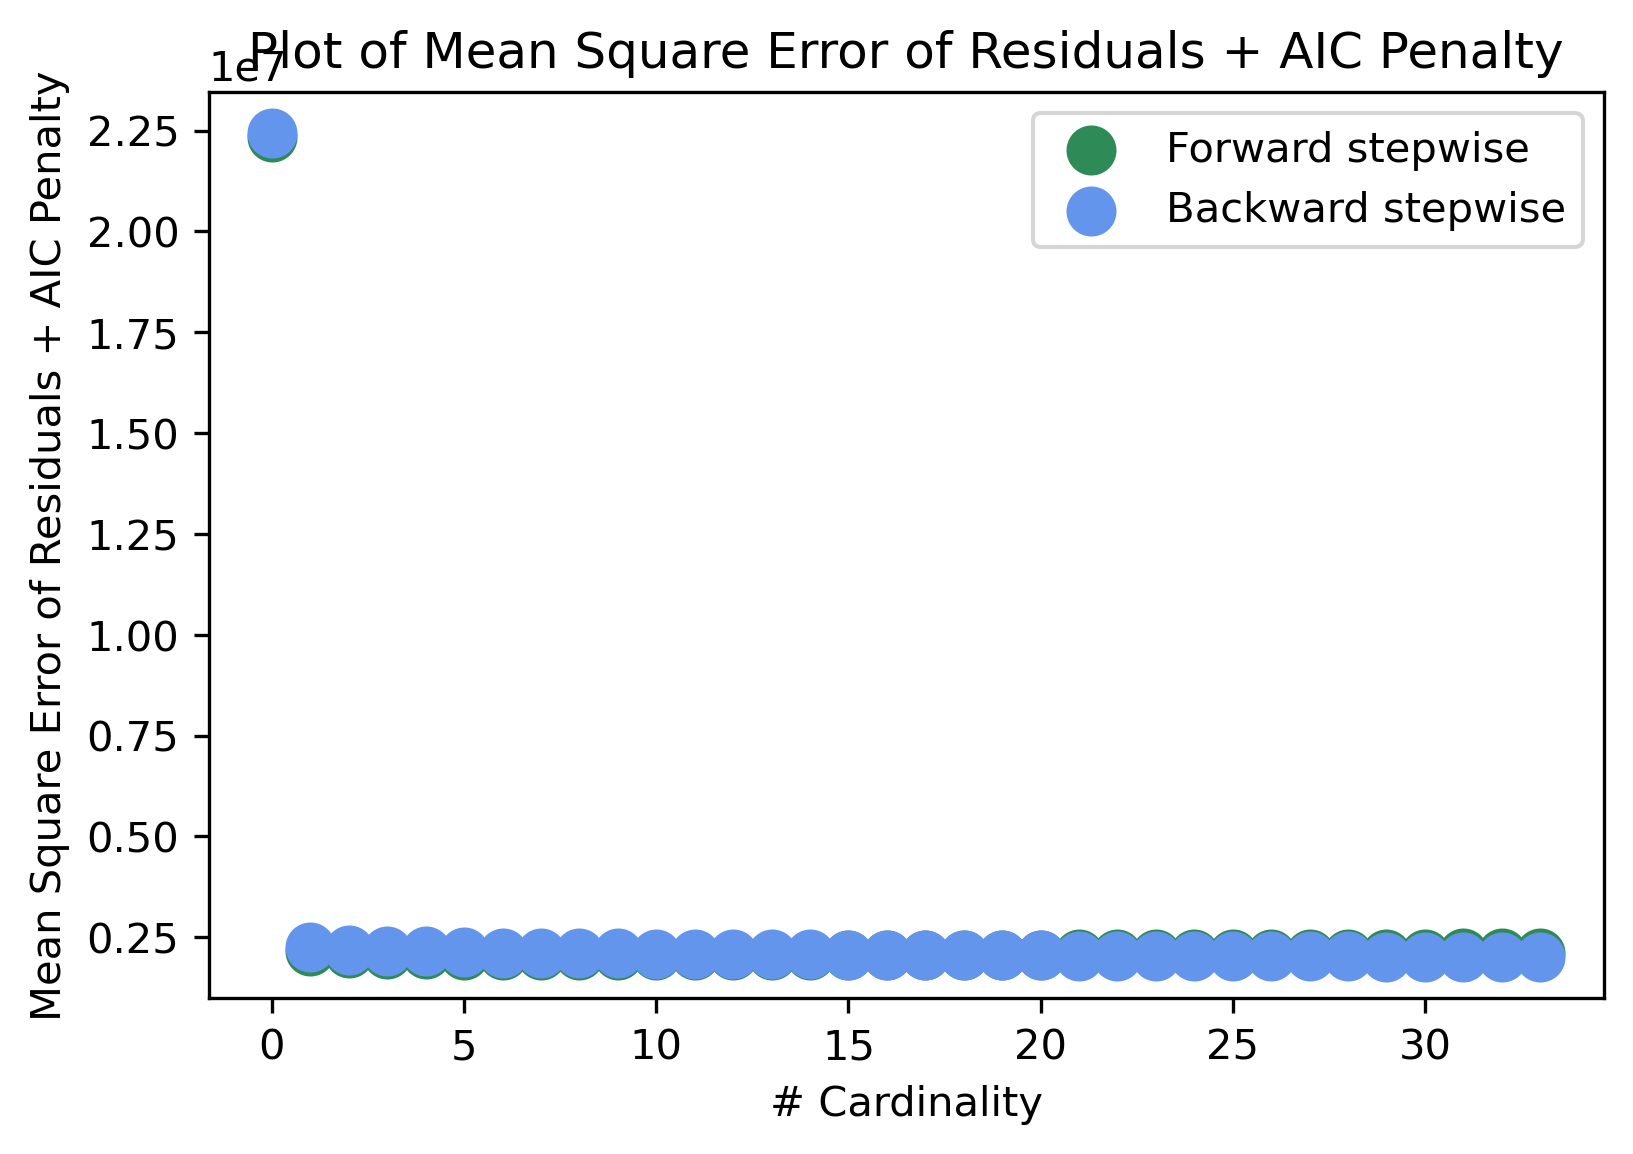

In [57]:

plt.figure()
cardinalities = range(p+1)
#plt.scatter(cardinalities, AIC_vals,color='red',linewidth=6,label='Subset selection')
plt.scatter(cardinalities, AIC_vals_fw,color='seagreen',linewidth=6,label='Forward stepwise')
plt.scatter(cardinalities, r_AIC_vals_bw,color='cornflowerblue',linewidth=6,label='Backward stepwise')
plt.title('Plot of Mean Square Error of Residuals + AIC Penalty')
plt.xlabel("# Cardinality")
plt.ylabel("Mean Square Error of Residuals + AIC Penalty")

#Mark the value of the best MSE
#plt.axvline(trainMSE_vals.index(min(trainMSE_vals)), linestyle='--', color='lightcoral',label=r'best trainMSE')

#Mark the value of the best AIC
#plt.axvline(AIC_vals.index(min(AIC_vals)), linestyle='--', color='palegreen',label=r'best AIC')

#Mark the value of the best BIC
#plt.axvline(BIC_vals.index(min(BIC_vals)), linestyle='--', \
 #         color='lightskyblue',label=r'best BIC')

#plt.ylim(0,50)
plt.legend(loc='upper right')
# plt.xlim(-0.5, p+10)
plt.show()

In [58]:
print("Backward")
for i in range(p+1):
    print("Feature:"+ str(subsets_bw[i]["features"])+", AIC: "+ str(subsets_bw[i]["trainMSE"]) )

print("forward")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )
print("subset")
for i in range(p+1):
    print("Feature:"+ str(subsets_fw[i]["features"])+", AIC: "+ str(subsets_fw[i]["trainMSE"]) )

Backward
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009256.9155560976
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32], AIC: 2009257.9310278033
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32], AIC: 2009259.661153153
Feature:[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32], AI

In [62]:
subsets_fw[33]['testMSE'].min()

1937124.5218729193

# Classification ...

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [23]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
Y=dataset["Attrition"]

In [25]:
data=dataset[dataset.columns[~dataset.columns.isin(["Attrition"])]]



In [26]:
data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [27]:
#Split up the big data set into a test set (for final evaluation) and a training set
X_train, X_test, y_train, y_test = train_test_split( data,Y, train_size=1400)


In [28]:
lr=LogisticRegression()
model=lr.fit(X_train, y_train)
y_pred=model.predict(X_test)

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score ar

In [29]:
lda=LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[56  7]
 [ 2  5]]
              precision    recall  f1-score   support

          No      0.889     0.966     0.926        58
         Yes      0.714     0.417     0.526        12

    accuracy                          0.871        70
   macro avg      0.802     0.691     0.726        70
weighted avg      0.859     0.871     0.857        70



In [30]:
qda=QuadraticDiscriminantAnalysis()
model = qda.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[43  2]
 [15 10]]
              precision    recall  f1-score   support

          No      0.956     0.741     0.835        58
         Yes      0.400     0.833     0.541        12

    accuracy                          0.757        70
   macro avg      0.678     0.787     0.688        70
weighted avg      0.860     0.757     0.784        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [31]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [32]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))


[[51  6]
 [ 7  6]]
              precision    recall  f1-score   support

          No      0.895     0.879     0.887        58
         Yes      0.462     0.500     0.480        12

    accuracy                          0.814        70
   macro avg      0.678     0.690     0.683        70
weighted avg      0.820     0.814     0.817        70



In [33]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [34]:
y_pred=model.predict(X_test)

In [35]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier(n_neighbors=20)
model=knn.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [51]:
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred, digits=3))

[[58 12]
 [ 0  0]]
              precision    recall  f1-score   support

          No      0.829     1.000     0.906        58
         Yes      0.000     0.000     0.000        12

    accuracy                          0.829        70
   macro avg      0.414     0.500     0.453        70
weighted avg      0.687     0.829     0.751        70



/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rayhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
